### Concurrency 2022/2023

## Quantum Computing - Final Project 

## Solving satisfiability problems with Grover's Algorithm

Trabalho realizado por:

Carlos Eduardo da Silva Machado A96936

Gonçalo Manuel Maia de Sousa A97485

## Descrição do Problema

O algoritmo de Grover é considerado um dos mais poderosos algoritmos quânticos, pois oferece uma melhoria quadrática ($\mathcal{O}(\sqrt{N})$) em relação aos algoritmos clássicos ($\mathcal{O}(N)$), quando falamos em procuras não estruturadas. Mas podemos generalizar este algoritmo para outros problemas como o problema de satisfazibilidade que procuramos resolver neste trabalho.

Queremos, portanto, resolver o problema de satisfazibilidade através do algoritmo de Grover, para tal, vamos:
1. Criar uma fórmula 3-SAT solucionável;
2. Implementar o algoritmo de Grover de forma a resolver o problema;
3. Avaliar a qualidade da solução obtida pelo algoritmo;
4. Estudar a complexidade associada ao algoritmo aplicado ao problema.

## Resolução do Problema

#####  Desenvolvimento de uma formula 3-SAT solucionável

Uma fórmula 3-SAT é composta por um ou mais clausulas que são constitúidas por exatamente 3 literais, sendo assim, um exemplo para uma fórmula 3-SAT seria $f(v_1,v_2,v_3) = (\neg v_1 \lor v_2 \lor v_3) \land (v_1 \lor \neg v_2 \lor v_3)$.

f1 = $(\neg v_1 \lor v_2 \lor v_3)$

f2 = $(v_1 \lor \neg v_2 \lor v_3)$

A tabela de verdade para esta fórmula exemplo será:

| v1 | v2 | v3 | f1 | f2 | f |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 0 | 0 | 0 | 1 | 1 | 1 |
| 0 | 0 | 1 | 1 | 1 | 1 |
| 0 | 1 | 0 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 | 1 | 1 |
| 1 | 0 | 0 | 0 | 1 | 0 |
| 1 | 0 | 1 | 1 | 1 | 1 |
| 1 | 1 | 0 | 1 | 1 | 1 |
| 1 | 1 | 1 | 1 | 1 | 1 |

Neste exemplo, temos uma fórmula 3-SAT com mais de uma solução.

Vamos procurar por uma fórmula 3-SAT com apenas uma solução, por isso, pegamos na fórmula exemplo e acrescentamos algumas clausulas de forma a termos apenas uma solução:


$$f(v_1,v_2,v_3) = (\neg v_1 \lor v_2 \lor v_3) \land (v_1 \lor \neg v_2 \lor v_3) \land (v_1 \lor v_2 \lor v_3) \land (v_1 \lor \neg v_2 \lor \neg v_3) \land (\neg v_1 \lor v_2 \lor \neg v_3) \land (\neg v_1 \lor \neg v_2 \lor v_3) \land (\neg v_1 \lor \neg v_2 \lor \neg v_3)$$

$$
f1 = (\neg v_1 \lor v_2 \lor v_3) \\
f2 = (v_1 \lor \neg v_2 \lor v_3) \\
f3 = (v_1 \lor v_2 \lor v_3) \\
f4 = (v_1 \lor \neg v_2 \lor \neg v_3) \\
f5 = (\neg v_1 \lor v_2 \lor \neg v_3) \\
f6 = (\neg v_1 \lor \neg v_2 \lor v_3) \\
f7 = (\neg v_1 \lor \neg v_2 \lor \neg v_3)
$$

Deste modo, a nova tabela de verdade será:

| v1 | v2 | v3 | f1 | f2 | f3 | f4 | f5 | f6 | f7 | f |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 0 | 0 | 0 | 1 | 1 | 0 | 1 | 1 | 1 | 1 | 0 |
| 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| 0 | 1 | 0 | 1 | 0 | 1 | 1 | 1 | 1 | 1 | 0 |
| 0 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 1 | 1 | 0 |
| 1 | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 0 |
| 1 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 1 | 0 |
| 1 | 1 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

Importar as bibliotecas necessárias

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_distribution
from qiskit.circuit.library import ZGate, MCXGate
import matplotlib.pyplot as plt
import numpy as np

Função disponibilizada nas fichas práticas

In [2]:
def execute_circuit(qc, shots=1024, device="qasm", decimal=False, reversed=False):
    
    #define backend
    if device == "qasm":
        device = Aer.get_backend('qasm_simulator')
        #get counts
        counts = execute(qc, device, shots=shots).result().get_counts()
        
        if decimal:
            if reversed:
                counts = dict((int(a[::-1],2),b) for (a,b) in counts.items())
            else:
                counts = dict((int(a,2),b) for (a,b) in counts.items())
        else:
            if reversed:
                counts = dict((a[::-1],b) for (a,b) in counts.items())
            else:
                counts = dict((a,b) for (a,b) in counts.items())

        return counts
    
    elif device=="statevector":
        device = Aer.get_backend('statevector_simulator')
        state_vector = execute(qc, device).result().get_statevector()

        return state_vector

O algoritmo de Grover é constituído por 3 fases:
- Sobreposição uniforme dos elementos da base de dados
- Oŕaculo, marcamos a solução que pretendemos encontrar
- Operador de difusão que aumenta a probabilidade de encontrarmos a solução

Função oráculo cujo objetivo é marcar a solução:

Para tal foi utilizado o gate 'MCXGate'que, aplica um gate 'X' às variaveis lógicas que devem ser 0 para uma determinada solução codificada pela 'bitstring', marca a solução através de um _Multi-control Tofilli_, que se ativado realiza _kick Back_ da fase da 'ancilla'. 

In [3]:
def oracle(qr, ancilla, bitstring=None):
    qc = QuantumCircuit(qr, ancilla)
    cx_gate = MCXGate(len(qr),ctrl_state=bitstring)
    qc = qc.compose(cx_gate)
    
    qc.barrier()
    return qc

O difusor procura aumentar a amplitude da solução, para tal é desfeita a sobreposição e aplicado um gate 'x' a todos os qubits de forma a agir apenas sobre o vetor $|0 \rangle$. Posteriormente a fase é trocada e o estado é reposto.

In [4]:
def diffusion_operator(qr, ancilla, n_qubits):

    qc = QuantumCircuit(qr,ancilla)
    
    qc.h(qr)
    qc.x(qr[-1])
    
    cz = ZGate().control(n_qubits-1, ctrl_state="0"*(n_qubits-1))
    qc = qc.compose(cz)
    
    qc.x(qr[-1])
    qc.h(qr)
    
    qc.barrier()
    
    return qc 

Função principal que prepara os qubits que representam os elementos numa base de dados e o qubit ancilla e cria o circuito quantico correspondente ao algoritmo de Grover:

In [5]:
def grover(n_qubits, bitstring):
    qr = QuantumRegister(n_qubits, name="Literal")
    cr = ClassicalRegister(n_qubits)
    ancilla = QuantumRegister(1, name="Ancilla")
    
    qc = QuantumCircuit(qr,ancilla,cr)
    qc.h(qr)
    qc.x(ancilla)
    qc.h(ancilla)
    
    qc = qc.compose(oracle(qr, ancilla, bitstring=bitstring))
    qc = qc.compose(diffusion_operator(qr, ancilla, n_qubits))
    
    qc.barrier()
    
    return qc.draw(output="mpl")

Para executar o algoritmo é necessário inicializar o circuito.

Para tal são criados três qubits para as variaveis lógicas e um bit auxiliar, 'ancilla' para a facilitar a marcação das fases.

Inicialmente os qubits das variáveis são colocados em sobreposição por meio de um gate 'Hadamard' e a ancilla é negada.

O segundo passo na execução do algoritmo envolve calcular o numero optimo de iterações e a aplicação do oráculo e difusor.

A explicação do número "óptimo" de iterações ficará para a secção da complexidade.

In [6]:
def optimalIterations(n_qubits, bitstring, mpl=True, i = None):
    qr=QuantumRegister(n_qubits, name="Literal")
    ancilla=QuantumRegister(1, name="Ancilla")
    cr=ClassicalRegister(n_qubits)
    
    qc = QuantumCircuit(qr,ancilla,cr)
    qc.h(qr)
    qc.x(ancilla)
    qc.h(ancilla)
    
    elements = 2**n_qubits
    if i == None:
        iterations=int(np.floor(np.pi/4 * np.sqrt(elements)))
    else:
        iterations = i
    
    for j in range(iterations):
        qc = qc.compose(oracle(qr,ancilla,bitstring=bitstring))
        qc = qc.compose(diffusion_operator(qr,ancilla,n_qubits))
    
    qc.measure(qr,cr)
    
    if(mpl):
        return qc.draw(output="mpl")
    else:
        counts = execute_circuit(qc, shots=1024, reversed=True)
        return plot_distribution(counts)

In [7]:
n_qubits = 3
bitstring = "010"

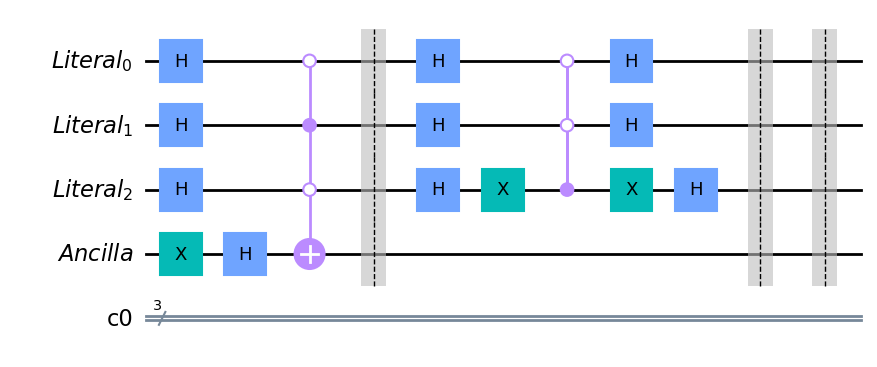

In [8]:
grover(n_qubits,bitstring)

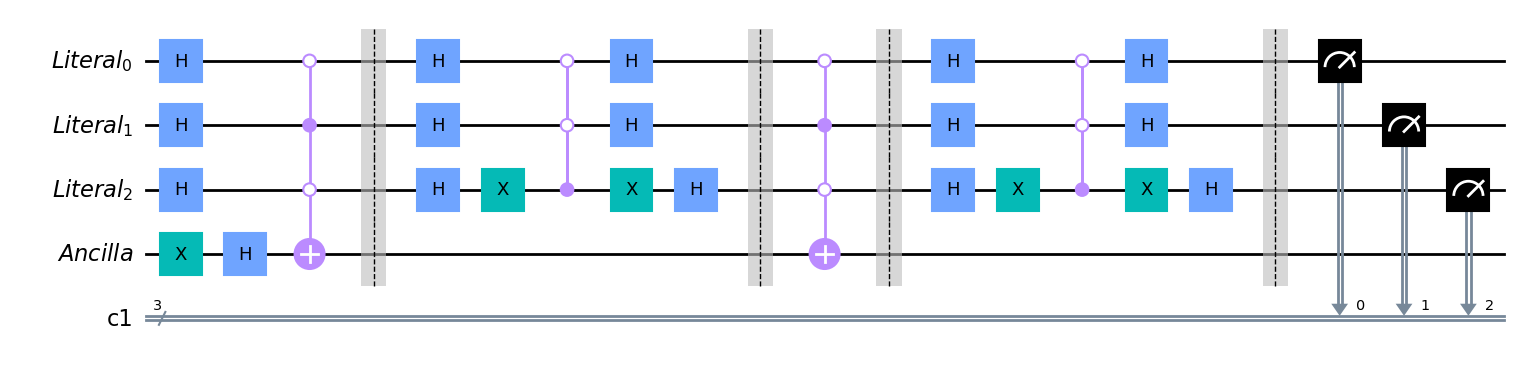

In [9]:
optimalIterations(n_qubits,bitstring)

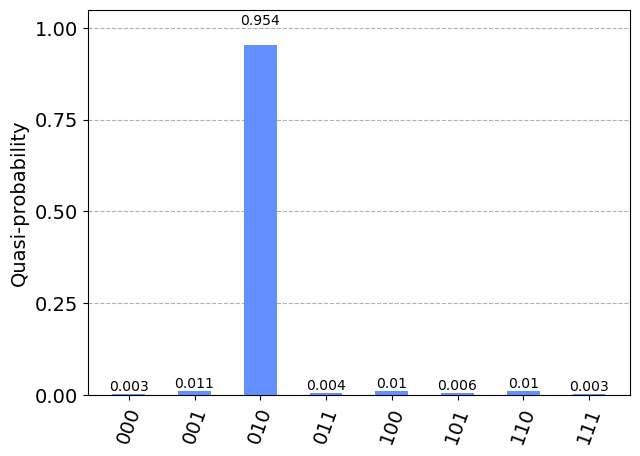

In [10]:
optimalIterations(n_qubits,bitstring, mpl=False)

Para mais do que uma solução:

Para calcular a complexidade temos de ter em consideração o número de soluções, e portanto, teremos O($\sqrt(N/M))$. Para N igual ao número de elementos e M igual ao número de soluções.

In [11]:
def optimalIterationsMultipleSols(n_qubits, solutions, mpl=True, shots = 1024):
    qr=QuantumRegister(n_qubits, name="Literal")
    ancilla=QuantumRegister(1, name="Ancilla")
    cr=ClassicalRegister(n_qubits)

    qc =QuantumCircuit(qr,ancilla,cr)
    qc.h(qr)

    qc.x(ancilla)
    qc.h(ancilla)


    elements = 2**n_qubits

    iterations=int(np.floor(np.pi/4 * np.sqrt(elements/len(solutions))))

    for j in range(iterations):
        for solution in solutions:
            qc = qc.compose(oracle(qr,ancilla,bitstring=solution))
        qc = qc.compose(diffusion_operator(qr,ancilla,n_qubits))
    
    
    qc.measure(qr,cr)
    
    if mpl:
        return qc.draw(output="mpl")
    else:
        counts = execute_circuit(qc, shots=shots, reversed=True)
        return plot_distribution(counts)

In [12]:
solutions = ["100","000"]
n_qubits = 3

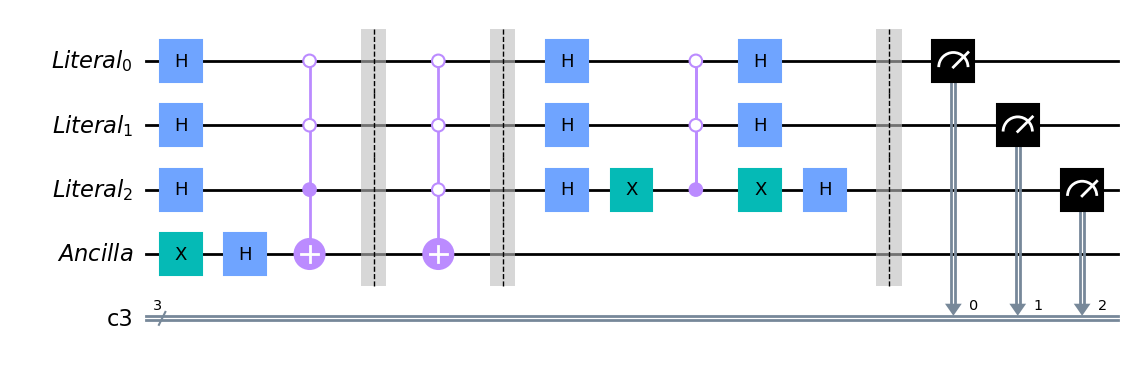

In [13]:
optimalIterationsMultipleSols(n_qubits, solutions)

No de caso de duas soluções, temos a certeza de que vamos obter uma da soluções.

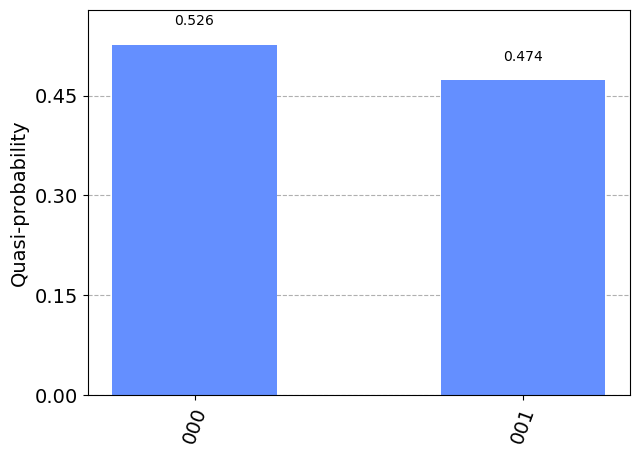

In [14]:
optimalIterationsMultipleSols(n_qubits, solutions, mpl=False)

Podemos, inclusive, escolher uma delas aleatoriamente, reduzindo o número de *shots* para 1:

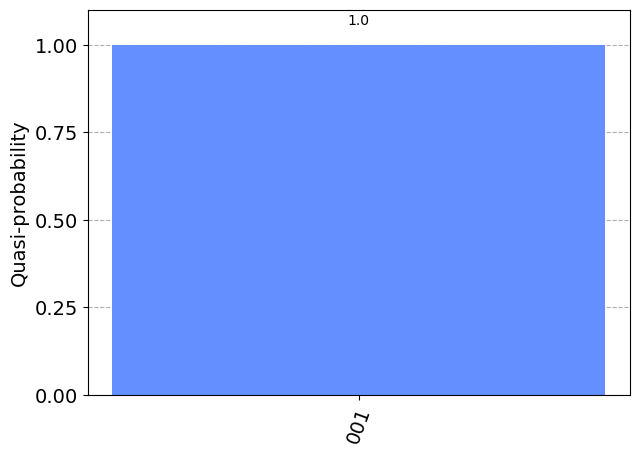

In [15]:
optimalIterationsMultipleSols(n_qubits, solutions, mpl=False, shots = 1)

Para três soluções, voltamos a ter alguma probabilidade de obter uma não solução.

In [16]:
solutions = ["100","000", "111"]
n_qubits = 3

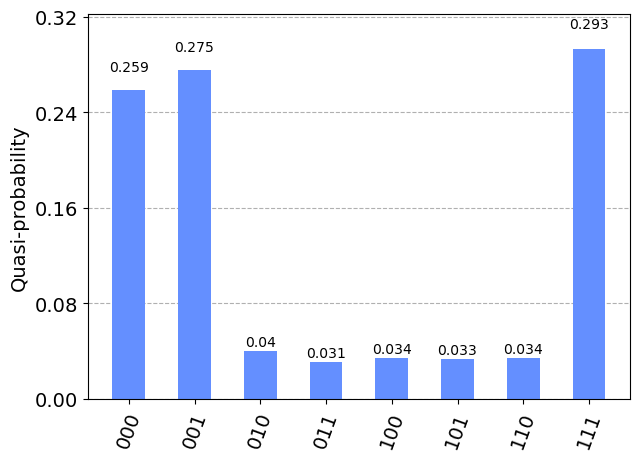

In [17]:
optimalIterationsMultipleSols(n_qubits, solutions, mpl=False)

A partir da metade das soluções, o algoritmo não é "útil" no sentido em que temos um grande número de soluções.

In [18]:
solutions = ["100","000", "111", "010"]
n_qubits = 3

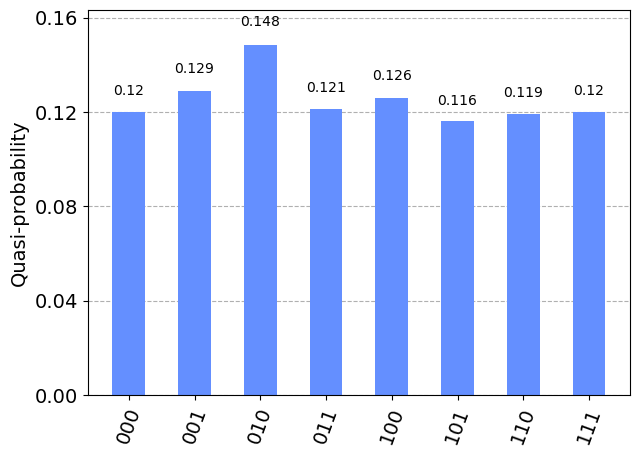

In [19]:
optimalIterationsMultipleSols(n_qubits, solutions, mpl=False)

## Análise da qualidade da solução.

Nesta secção iremos abordar a qualidade da solução de cada um dos exemplos anteriores. Acrescentando alguns testes.

Para o caso de uma solução obtivemos uma boa distrubuíção, apesar de não ser 100%.
Vamos análisar para bitstring = "010".

Para o número "ótimo" de iterações é $\lfloor \pi/4 * \sqrt 8 \rfloor$, ou seja, 2.

Podemos comprovar que vamos obter uma probabilidade similiar para o mesmo número de *shots*:

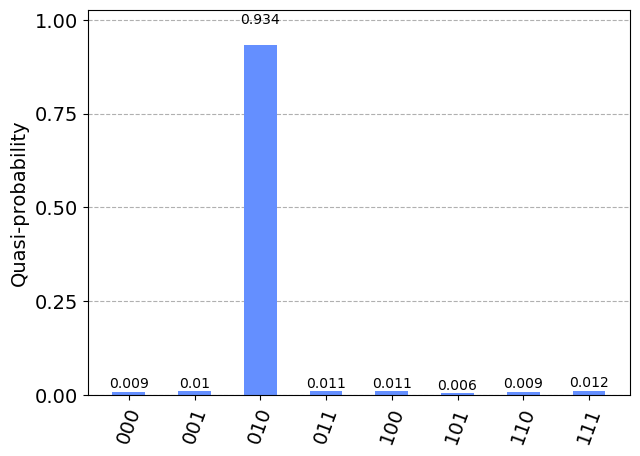

In [20]:
optimalIterations(n_qubits,"010",mpl=False)

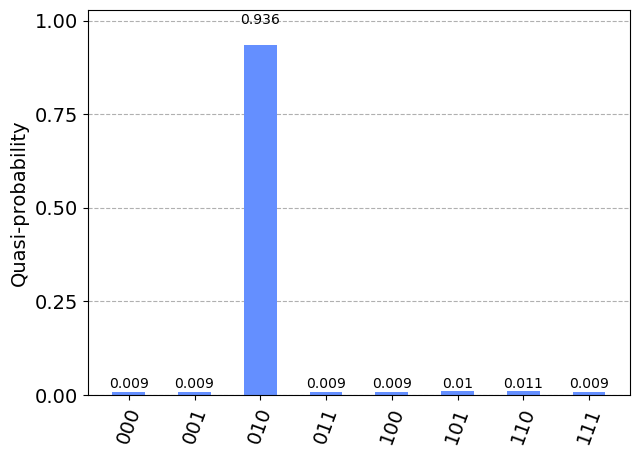

In [21]:
optimalIterations(n_qubits,"010",mpl=False, i=2)

Se tivessemos menos iterações teriamos uma menor probabilidade de encontrar a solução e uma maior probabilidade de encontrar uma não solução:

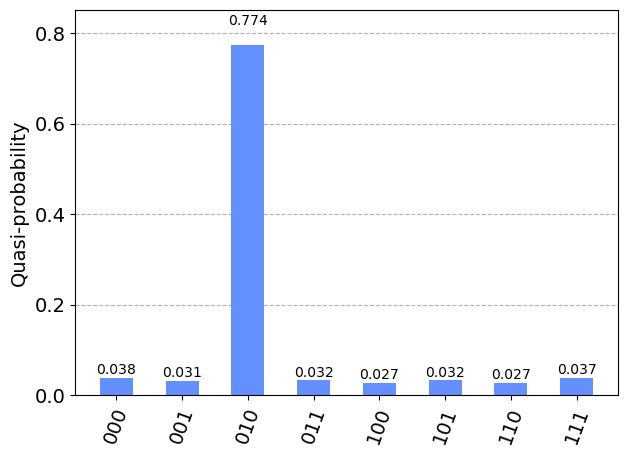

In [22]:
optimalIterations(n_qubits,"010",mpl=False, i=1)

Se iterassemos mais uma vez do que o número ideal, teríamos o efeito contrário, geometricamente, isto acontece porque o vetor "roda" para além do eixo:

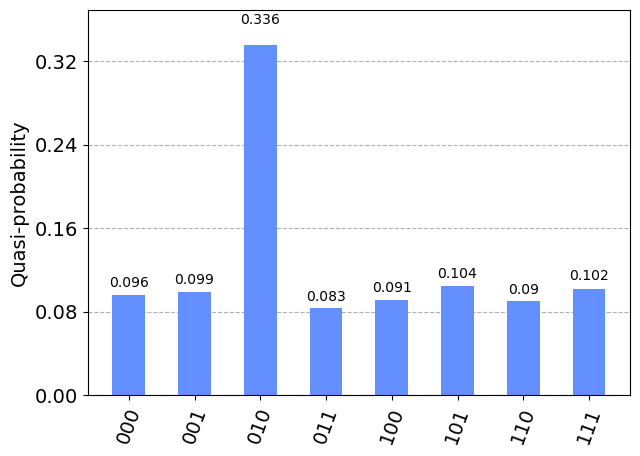

In [23]:
optimalIterations(n_qubits,"010",mpl=False, i=3)

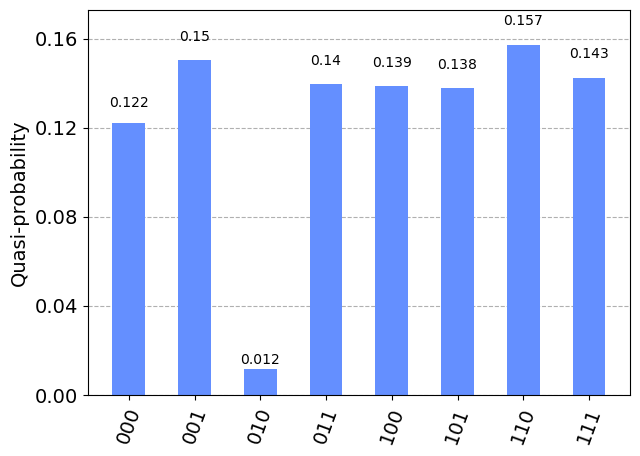

In [24]:
optimalIterations(n_qubits,"010",mpl=False, i=4)

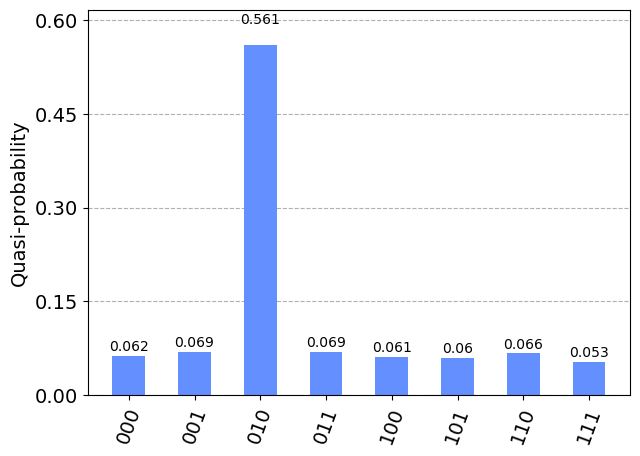

In [25]:
optimalIterations(n_qubits,"010",mpl=False, i=5)

Para mais do que uma solução, a ideia das iterações é igual, porém temos de ter em conta que a solução não é única.

No caso de duas soluções, temos a garantia de ter uma das duas, como visto no gráfico exemplo. Conseguimos generalizar esse facto, através de $(2j+1)\arcsin(\sqrt(M/N))$, sendo j o número de iterações, M o número de soluções e N o número de elementos. Para termos solução certa, $(2j+1)\arcsin(\sqrt(M/N))$ tem que ser igual a $\pi/2$, para tal precisamos que $\arcsin(\sqrt(M/N))$ seja $\pi/6$, isso apenas acontece quando M/N = 1/4, ou seja, M = N/4. Desse modo o número de iterações será sempre 1, pois $\lfloor \pi/4 * \sqrt(4)\rfloor$ que é igual a 1.
Assim para 5 qubits temos N = 2⁵ = 32 e M = 32/4 = 8. 

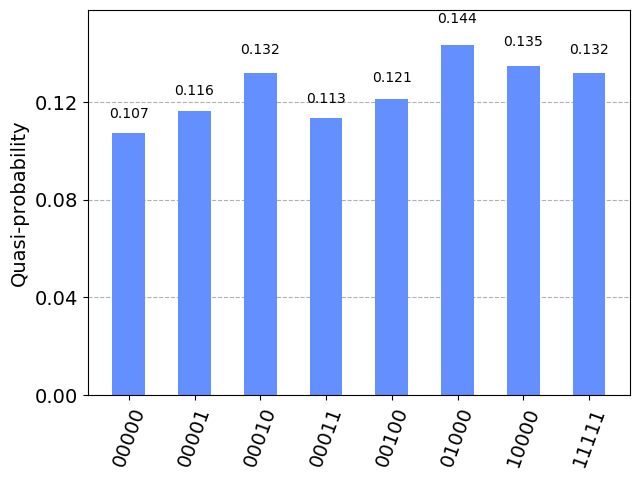

In [26]:
optimalIterationsMultipleSols(5, ["10000", "00000","11111", "01000","00100", "00010","00001", "11000"], mpl=False)

Para M >= N/2, como visto no caso de metade soluções não funciona
Para exatamente M = N/2, $\lfloor \pi/4 * \sqrt(N/(N/2))\rfloor$, ou seja, $\lfloor \pi/4 * \sqrt(2)\rfloor$ que é igual a 0, ou seja, não conseguimos iterar nenhuma vez. Para M>N/2, a raiz quadrada de N/M será sempre menor que $\sqrt(2)$, e por isso, o número de iterações vai dar sempre 0.

## Complexidade

De forma a maximizar a probabilidade de encontrarmos a solução correta, criamos uma função que aplica a segunda e terceira fase do algoritmo de grover um número de vezes "ótimo", isto é, se aplicarmos poucas vezes não obtemos a melhor precisão, porém se aplicarmos a mais do que o necessário, obtemos o efeito contrário do que desejamos pois vamos passar da solução que fica geometricamente no ângulo $\pi$/2.

A fórmula pode ser dada como: $\psi = \cos(\theta + 2\theta)|w\rangle + \sin(\theta + 2\theta)|\overline w\rangle$

Onde |w$\rangle$ é a solução e $|\overline w\rangle$ são as não soluções.

Ora se queremos aplicar um número de vezes, k, então:
$\cos((2*k+1)*\theta)|w\rangle + \sin((2*k+1)*\theta)|\overline w\rangle$

Sabemos que $\sin²((2k+1)*\theta)$ é aproximadamente 1 logo (2k+1) $\theta$ é aproximadamente $\arcsin(1)$

Logo k será, aproximadamente, $\arcsin(1)/2\theta - 1/2$, ou seja, $\lfloor \pi/4 * \sqrt{2^n} \rfloor $, com $\sin(\theta) = 1/\sqrt{2^n}$ e por isso, $\theta = \arcsin1/\sqrt{2^n}$

O algoritmo de Grover aqui implementado depende principalmente de um par de fatores, o número de elementos no universo de procura, que chamamos N e o número de soluções, que chamamos M.

Para uma solução, a complexidade do algoritmo é $O(\sqrt{N})$.

Sendo N = 2^n.

A solução pode ser interpretada como um vetor cujo angulo inicial é $sin^{-1}(\sqrt{\frac{M}{N}})$ que chamaremos $\alpha$.

O ângulo do vetor após uma iteração do oráculo e difusor é $2\alpha + \alpha$.

Assim tomando $i$ como o número de iterações óptimas, basta resolver $i$, tal que:
$$
(2\theta*k + \theta) \approx \frac{\pi}{2}
$$
Temos então que $i = \lfloor \frac{\pi}{4}\sqrt{\frac{N}{M}}\rfloor$

Então a complexidade do algoritmo é $O(\sqrt{\frac{N}{M}})$ 

## Outras Resoluções

No site https://qiskit.org/textbook/ch-algorithms/grover.html dado nas referencias do enunciado, o algoritmo de Grover é utilizado para resolver o Sudoku sem saber à partida a solução. Com essa inspiração, resolvemos implementar uma alternativa ao problema, em que não sabemos a solução da fórmula 3-SAT.

Vamos reutilizar a fórmula f acima criada:

$$f(v_1,v_2,v_3) = (\neg v_1 \lor v_2 \lor v_3) \land (v_1 \lor \neg v_2 \lor v_3) \land (v_1 \lor v_2 \lor v_3) \land (v_1 \lor \neg v_2 \lor \neg v_3) \land (\neg v_1 \lor v_2 \lor \neg v_3) \land (\neg v_1 \lor \neg v_2 \lor v_3) \land (\neg v_1 \lor \neg v_2 \lor \neg v_3)$$

$$
f1 = (\neg v_1 \lor v_2 \lor v_3) \\
f2 = (v_1 \lor \neg v_2 \lor v_3) \\
f3 = (v_1 \lor v_2 \lor v_3) \\
f4 = (v_1 \lor \neg v_2 \lor \neg v_3) \\
f5 = (\neg v_1 \lor v_2 \lor \neg v_3) \\
f6 = (\neg v_1 \lor \neg v_2 \lor v_3) \\
f7 = (\neg v_1 \lor \neg v_2 \lor \neg v_3)
$$

Como não existe propriamente um operador ou, nós definimos esse $\lor$ através dos operador unário $\neg$ e o operador binário $\land$, isso é possível, pois {$\land$, $\neg$} é um conjunto completo de conetivos e, portanto, conseguimos obter o $\lor$ através deles.
Desse modo, aplicamos a lei de De Morgan para remover os operadores $\lor$ de cada cláusula.

$$f(v_1,v_2,v_3) = \neg(v_1 \land \neg v_2 \land \neg v_3) \land \neg (\neg v_1 \land v_2 \land \neg v_3) \land \neg (\neg v_1 \land \neg v_2 \land v_3) \land \neg (\neg v_1 \land v_2 \land v_3) \land \neg (v_1 \land \neg v_2 \land v_3) \land \neg (v_1 \land v_2 \land \neg v_3) \land \neg (v_1 \land v_2 \land v_3)$$

$$
f1 = \neg (v_1 \land \neg v_2 \land \neg v_3) \\
f2 = \neg (\neg v_1 \land v_2 \land \neg v_3) \\
f3 = \neg (\neg v_1 \land \neg v_2 \land v_3) \\
f4 = \neg (\neg v_1 \land v_2 \land v_3) \\
f5 = \neg (v_1 \land \neg v_2 \land v_3) \\
f6 = \neg (v_1 \land v_2 \land \neg v_3) \\
f7 = \neg (v_1 \land v_2 \land v_3)
$$



A Função oráculo foi construída de forma a marcar a solução pretendida, ou seja, a solução "001".

A construção do oráculo é feita de acordo com a fórmula f, cada qubit "clausula" simboliza realmente cada cláusula da fórumula 3-SAT. Dessa forma, como os qubits começam no estado $|0\rangle$, e, portanto, negamos cada qubit "literal" antes e depois da *multi-controled X gate* caso ele esteja negado na fórmula. Depois de aplicar a mcx, negamos o resultado, pois todas as cláusulas estão negadas, fazemos isso para todas elas. No final, o resultado vai ser determinado através de novamente uma mcx cujo target é a ancilla. Se todos os qubits "clausula" estiverem no estado $|1\rangle$, a gate é aplicada e acontece o *phase kick back*.

É também importante realçar que fazemos *Decomputing*, isto é, repetimos as operações que fizemos nos qubits para voltar a po-los no estado inicial, uma vez que os qubits das clausulas são qubits auxiliares, podendo ser usados por outras funções.

In [27]:
def SAT_Oracle(qr, clausulas, ancilla):
        
    qc = QuantumCircuit(qr, clausulas, ancilla)

    #f1
    qc.x(qr[1])
    qc.x(qr[2])
    qc.mcx(qr,clausulas[0])
    qc.x(clausulas[0])
    qc.x(qr[1])
    qc.x(qr[2])
    
    #f2
    qc.x(qr[0])
    qc.x(qr[2])
    qc.mcx(qr,clausulas[1])
    qc.x(clausulas[1])
    qc.x(qr[0])
    qc.x(qr[2])
    
    #f3
    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    qc.mcx(qr,clausulas[2])
    qc.x(clausulas[2])
    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    
    #f4
    qc.x(qr[0])
    qc.mcx(qr,clausulas[3])
    qc.x(clausulas[3])
    qc.x(qr[0])
    
    #f5
    qc.x(qr[1])
    qc.mcx(qr,clausulas[4])
    qc.x(clausulas[4])
    qc.x(qr[1])
    
    #f6
    qc.x(qr[2])
    qc.mcx(qr,clausulas[5])
    qc.x(clausulas[5])
    qc.x(qr[2]) 

    #f7
    qc.mcx(qr,clausulas[6])
    qc.x(clausulas[6])

    qc.mcx(clausulas,ancilla)

    #f7
    qc.mcx(qr,clausulas[6])
    qc.x(clausulas[6])
    
    #f6
    qc.x(qr[2])
    qc.mcx(qr,clausulas[5])
    qc.x(clausulas[5])
    qc.x(qr[2])
    
    #f5
    qc.x(qr[1])
    qc.mcx(qr,clausulas[4])
    qc.x(clausulas[4])
    qc.x(qr[1])
    
    #f4
    qc.x(qr[0])
    qc.mcx(qr,clausulas[3])
    qc.x(clausulas[3])
    qc.x(qr[0])
    
    #f3
    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    qc.mcx(qr,clausulas[2])
    qc.x(clausulas[2])
    qc.x(qr[0])
    qc.x(qr[1])
    qc.x(qr[2])
    
    #f2
    qc.x(qr[0])
    qc.x(qr[2])
    qc.mcx(qr,clausulas[1])
    qc.x(clausulas[1])
    qc.x(qr[0])
    qc.x(qr[2])
    
    #f1
    qc.x(qr[1])
    qc.x(qr[2])
    qc.mcx(qr,clausulas[0])
    qc.x(clausulas[0])
    qc.x(qr[1])
    qc.x(qr[2])

    qc.barrier()
    
    return qc

Esta função é extremamente parecida à anterior, apenas trocamos uma das cláusulas para ter uma solução diferente, que será "000".

In [28]:
def SAT_Oracle1(qr, clausulas, ancilla):
    
    qc = QuantumCircuit(qr,clausulas, ancilla)

    #f1
    qc.x(qr[1])
    qc.x(qr[2])
    qc.mcx(qr,clausulas[0])
    qc.x(clausulas[0])
    qc.x(qr[1])
    qc.x(qr[2])
    
    #f2
    qc.x(qr[0])
    qc.x(qr[2])
    qc.mcx(qr,clausulas[1])
    qc.x(clausulas[1])
    qc.x(qr[0])
    qc.x(qr[2])
    
    #f3
    qc.x(qr[0])
    qc.x(qr[1])
    qc.mcx(qr,clausulas[2])
    qc.x(clausulas[2])
    qc.x(qr[0])
    qc.x(qr[1])
    
    #f4
    qc.x(qr[0])
    qc.mcx(qr,clausulas[3])
    qc.x(clausulas[3])
    qc.x(qr[0])
    
    #f5
    qc.x(qr[1])
    qc.mcx(qr,clausulas[4])
    qc.x(clausulas[4])
    qc.x(qr[1])
    
    #f6
    qc.x(qr[2])
    qc.mcx(qr,clausulas[5])
    qc.x(clausulas[5])
    qc.x(qr[2]) 

    #f7
    qc.mcx(qr,clausulas[6])
    qc.x(clausulas[6])

    qc.mcx(clausulas,ancilla)
        
    #f7
    qc.mcx(qr,clausulas[6])
    qc.x(clausulas[6])
    
    #f6
    qc.x(qr[2])
    qc.mcx(qr,clausulas[5])
    qc.x(clausulas[5])
    qc.x(qr[2])
    
    #f5
    qc.x(qr[1])
    qc.mcx(qr,clausulas[4])
    qc.x(clausulas[4])
    qc.x(qr[1])
    
    #f4
    qc.x(qr[0])
    qc.mcx(qr,clausulas[3])
    qc.x(clausulas[3])
    qc.x(qr[0])
    
    #f3
    qc.x(qr[0])
    qc.x(qr[1])
    qc.mcx(qr,clausulas[2])
    qc.x(clausulas[2])
    qc.x(qr[0])
    qc.x(qr[1])
    
    #f2
    qc.x(qr[0])
    qc.x(qr[2])
    qc.mcx(qr,clausulas[1])
    qc.x(clausulas[1])
    qc.x(qr[0])
    qc.x(qr[2])
    
    #f1
    qc.x(qr[1])
    qc.x(qr[2])
    qc.mcx(qr,clausulas[0])
    qc.x(clausulas[0])
    qc.x(qr[1])
    qc.x(qr[2])
    
    qc.barrier()
    
    return qc

A função que realiza o algoritmo é parecida à da outra resolução, apenas realçando o facto de termos qubits auxiliares.

In [29]:
def SAT_Grover(n_qubits,n_clausulas):
    qr = QuantumRegister(n_qubits, name="Literal")
    cr = ClassicalRegister(n_qubits)
    clausulas = QuantumRegister(n_clausulas, name="Clausula")
    ancilla = QuantumRegister(1, name="Ancilla")
    
    qc = QuantumCircuit(qr,clausulas, ancilla,cr)
    qc.h(qr)
    qc.x(ancilla)
    qc.h(ancilla)
    
    qc = qc.compose(SAT_Oracle1(qr, clausulas, ancilla))
    qc = qc.compose(diffusion_operator(qr, ancilla, n_qubits))
    
    qc.barrier()
    
    return qc.draw(output="mpl")

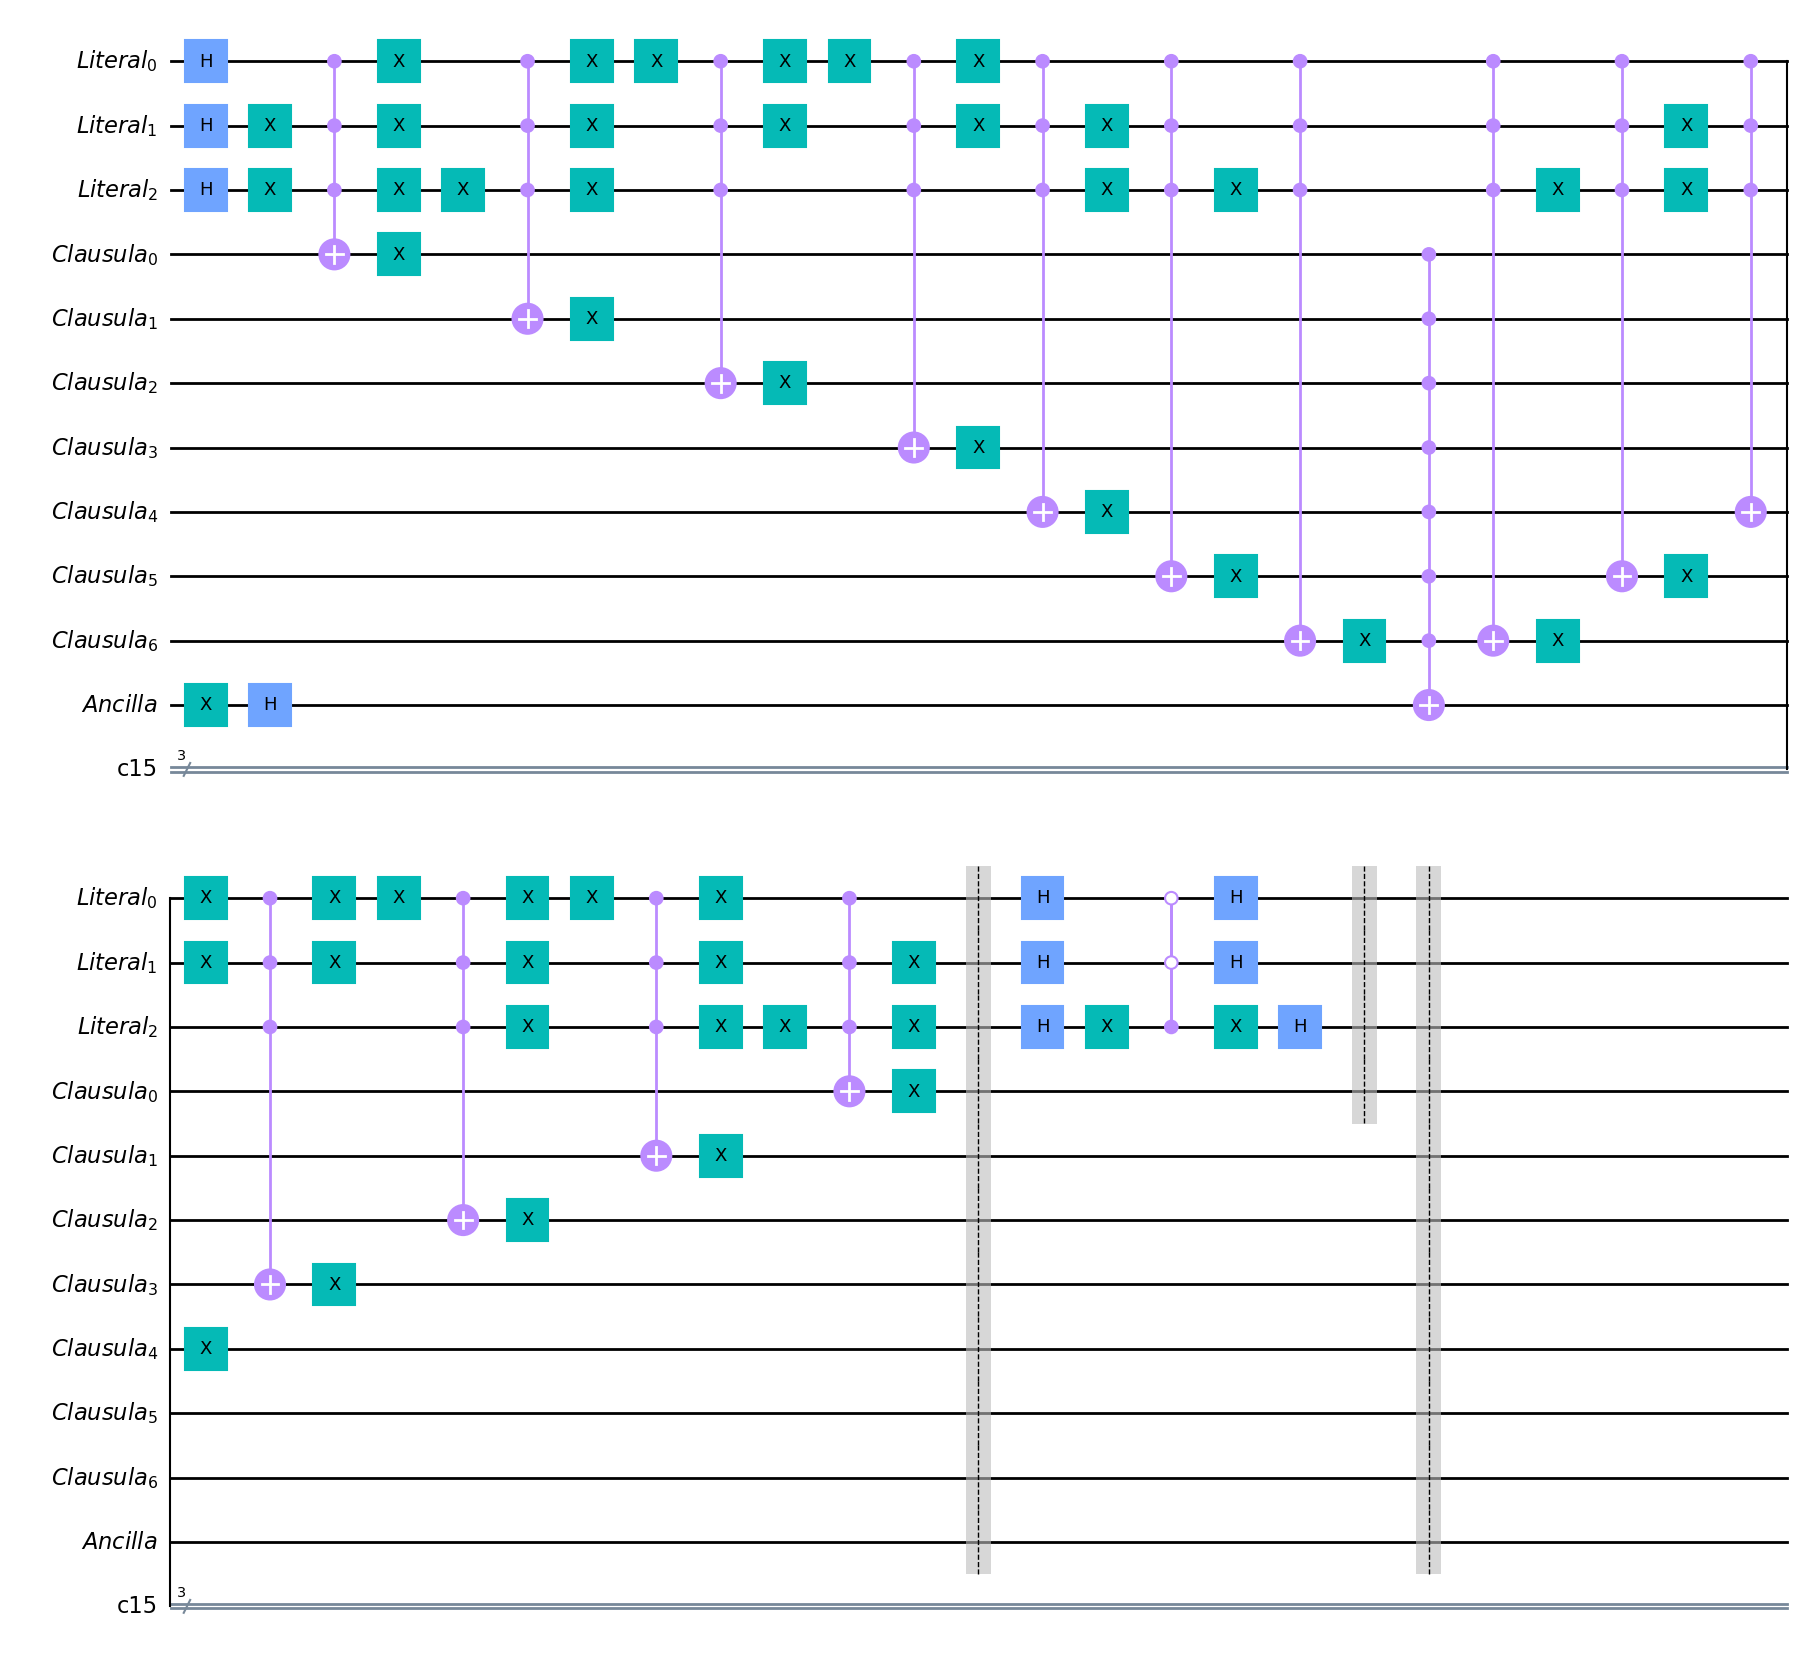

In [30]:
SAT_Grover(3, 7)

Função usual que itera o algoritmo com o número idela de iterações.

In [31]:
def SAT_optimalIterations(n_qubits,n_clausulas, mpl=True, oracle=SAT_Oracle):
    qr = QuantumRegister(n_qubits, name="Literal")
    cr = ClassicalRegister(n_qubits)
    clausulas = QuantumRegister(n_clausulas, name="Clausula")
    ancilla = QuantumRegister(1, name="Ancilla")
    
    qc = QuantumCircuit(qr,clausulas, ancilla,cr)
    qc.h(qr)
    qc.x(ancilla)
    qc.h(ancilla)
    
    qc.barrier()
    
    elements = 2**n_qubits
    iterations=int(np.floor(np.pi/4 * np.sqrt(elements)))
    
    for j in range(iterations):
        qc = qc.compose(oracle(qr, clausulas, ancilla))
        qc = qc.compose(diffusion_operator(qr, ancilla, n_qubits))
    
    qc.measure(qr,cr)
    
    if(mpl):
        return qc.draw(output="mpl")
    else:
        counts = execute_circuit(qc, shots=1024, reversed=True)
        return plot_distribution(counts)

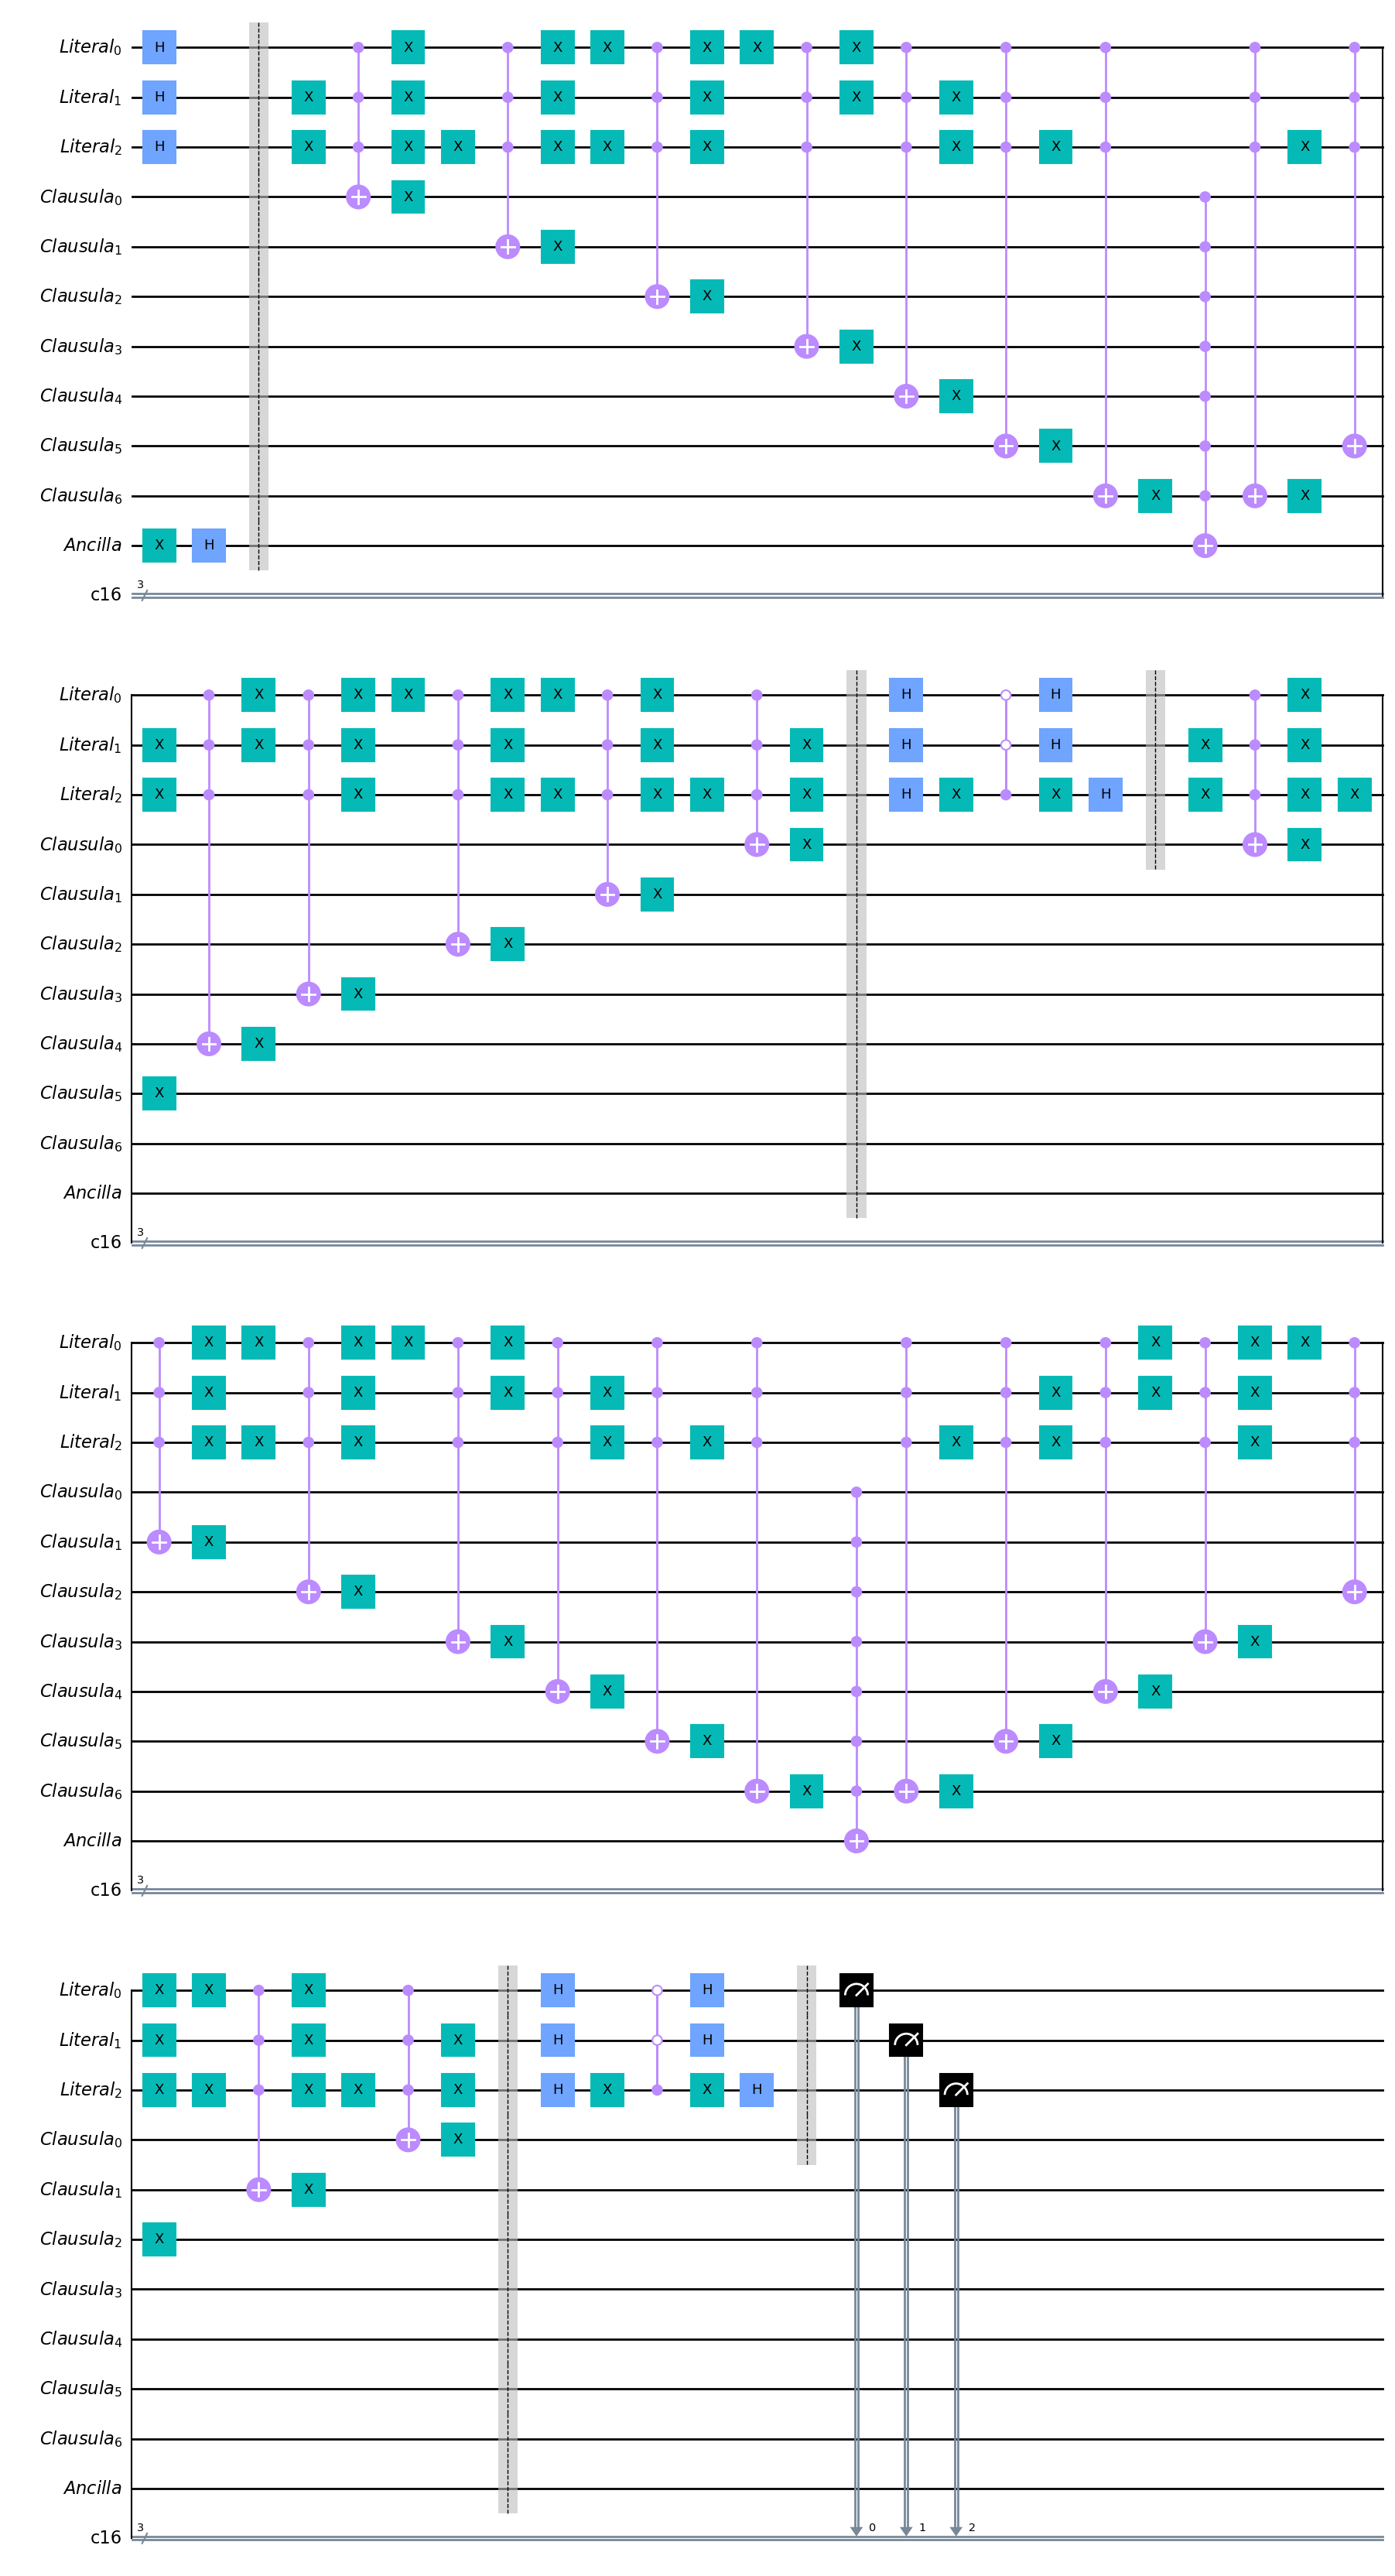

In [32]:
SAT_optimalIterations(3,7)

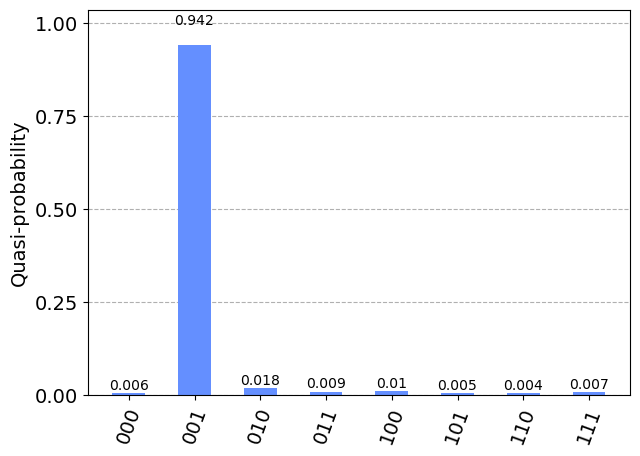

In [33]:
SAT_optimalIterations(3,7, mpl=False)

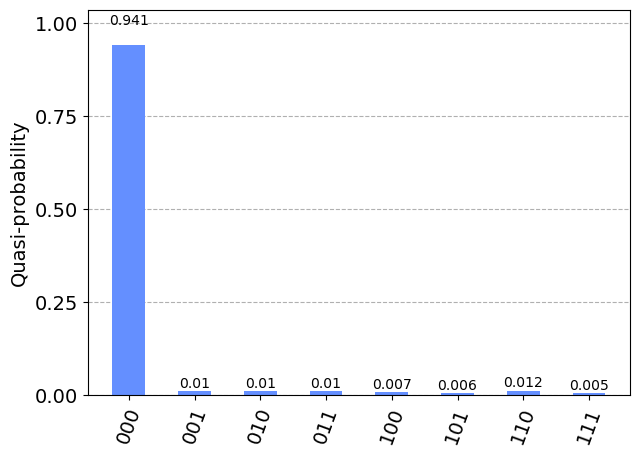

In [34]:
SAT_optimalIterations(3,7, mpl=False, oracle=SAT_Oracle1)

Resolver a fórmula SAT através do *Qiskit Aqua*

In [35]:
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle

Para utilizar o *Qiskit Aqua* temos de colocar a nossa fórmula no formato *DIMACS CNF* como demonstrado no https://qiskit.org/textbook/ch-applications/satisfiability-grover.html dado pelas referências do enunciado.

In [36]:
with open('formula.dimacs', 'r') as f:
    dimacs = f.read()
print(dimacs)

p cnf 3 7
-1 2 3 0
1 -2 3 0
1 2 3 0
1 -2 -3 0
-1 2 -3 0
-1 -2 3 0
-1 -2 -3 0


In [37]:
oracle = PhaseOracle.from_dimacs_file('formula.dimacs')
oracle.draw()

MissingOptionalLibraryError: "The 'tweedledum' library is required to use 'classical function oracles'. You can install it with 'pip install tweedledum'."

Verifier dado pelo Qiskit:

In [ ]:
class Verifier():
    """Create an object that can be used to check whether
    an assignment satisfies a DIMACS file.
        Args:
            dimacs_file (str): path to the DIMACS file
    """
    def __init__(self, dimacs_file):
        with open(dimacs_file, 'r') as f:
            self.dimacs = f.read()

    def is_correct(self, guess):
        """Verifies a SAT solution against this object's
        DIMACS file.
            Args:
                guess (str): Assignment to be verified.
                             Must be string of 1s and 0s.
            Returns:
                bool: True if `guess` satisfies the
                           problem. False otherwise.
        """
        # Convert characters to bools & reverse
        guess = [bool(int(x)) for x in guess][::-1]
        for line in self.dimacs.split('\n'):
            line = line.strip(' 0')
            clause_eval = False
            for literal in line.split(' '):
                if literal in ['p', 'c']:
                    # line is not a clause
                    clause_eval = True
                    break
                if '-' in literal:
                    literal = literal.strip('-')
                    lit_eval = not guess[int(literal)-1]
                else:
                    lit_eval = guess[int(literal)-1]
                clause_eval |= lit_eval
            if clause_eval is False:
                return False
        return True


Para verificar a correção temos de introduzir a solução ao contrário.

In [ ]:
v = Verifier('formula.dimacs')   
v.is_correct('100')

In [ ]:
# Configure backend
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)

# Create a new problem from the phase oracle and the
# verification function
problem = AmplificationProblem(oracle=oracle, is_good_state=v.is_correct)

# Use Grover's algorithm to solve the problem
grover = Grover(quantum_instance=quantum_instance)
result = grover.amplify(problem)
result.top_measurement

In [ ]:
plot_histogram(result.circuit_results)

Com o *Qiskit Aqua*, conseguimos observar que a solução que procuravamos("001", no *Aqua* está invertida), tal como na nossa resolução. 